<a href="https://colab.research.google.com/github/fedhere/MLTSA22_FBianco/blob/main/HW3/ARIMA_instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pylab as pl
import glob
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
import json
import os

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA22_FBianco/master/fbb.mplstyle")

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")


Mounted at /content/gdrive


loading HW2 cause that is where the data is, even if this is HW3

In [ ]:
cd /content/gdrive/MyDrive//MLTSA22/HW2

/content/gdrive/MyDrive/MLTSA22/HW2


# Part 1: data ingestion, exploration, preparation 
#...continuing on from HW2... 
you can start with the HW2 notebook you created or my solution which is in https://github.com/fedhere/MLTSA22_FBianco/tree/main/HW2


# ...

## testing for stationarity (you did it in HW2 but it will be useful have it here under your eyes)
test if each of these time series is stationary using the AD fuller test using ```statsmodels.api.tsa.stattools.adfuller()```

```for f in tss.columns:
    sm.tsa.stattools.adfuller(tss[c])```

Have the code automatically print a statement about wheather the ts is stationary for each ts (for example in a for loop).

In [ ]:
threshold = 0.05
print ("Stationarity results from the AD Fuller test at a p-value of 0.05")
for c in tss.columns:
    print(c, "is stationary:", sm.tsa.stattools.adfuller(tss[c])[1] < threshold)

Stationarity results from the AD Fuller test at a p-value of 0.05
a.us is stationary: False
aa.us is stationary: False
aaap.us is stationary: False
aaba.us is stationary: False
aac.us is stationary: False
aal.us is stationary: False
aamc.us is stationary: False
aame.us is stationary: True
aan.us is stationary: False
aaoi.us is stationary: False


# 1. Question: why did I set the threshold to 0.05? what does 0.05 mean? 
if you do not know the answer jump on slack to discuss it (or discuss with your classmates)

# 2. Task: measure autocorrelation

plot the time series and its autocorrelation and partial autocorrelation function in blue if it is not stationary, in red if it is stationary

As a reminder, the plotting function for the autocorrelation and partial autocorelation functions works as follows

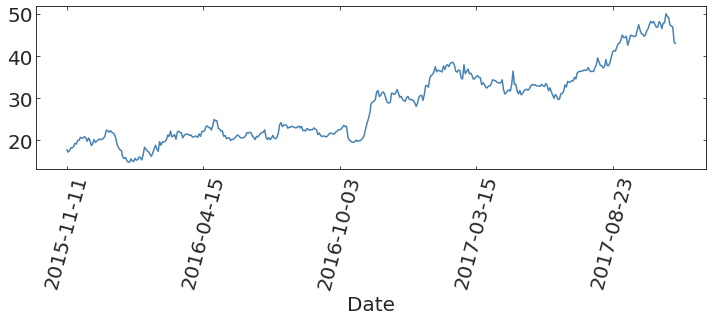

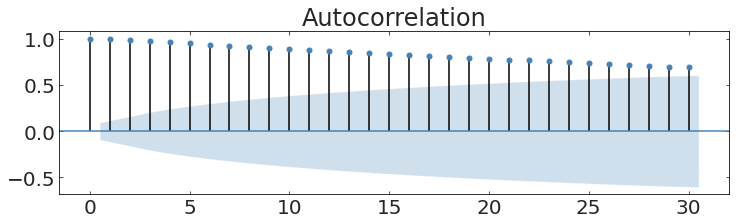

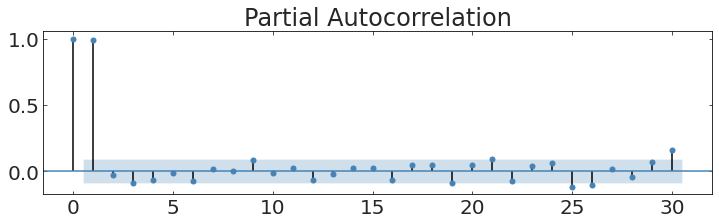

In [ ]:
tss["aa.us"].plot(rot=75, figsize=(12,3));
ax = pl.figure(figsize=(12,3)).add_subplot(111)
sm.graphics.tsa.plot_acf(tss["aa.us"], lags=30, ax=ax)
ax = pl.figure(figsize=(12,3)).add_subplot(111)
fig = sm.graphics.tsa.plot_pacf(tss["aa.us"], lags=30, ax=ax);

Fig 4: ...

# 3. Question: pick one of the time series (of your choice) and tell me which lags are expected to be significant in the model based on the ACF and PACF plots you made

# 4. Task: training and testing split
To set up a training and test set for this, remove the last two months of data (60 days) and use it as a test set. Were your predictions good enough to make you rich? Predict 100 days forward of the training set

you do not have to overthink it and create differnt variables, you can simply select data without the last 2 month when you pass the data to the fit function. Here, make a plot of the first time series plotting in blue the training data and in orange the test data

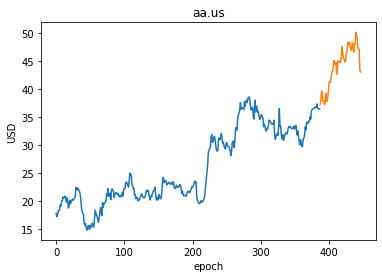

In [ ]:
pl.plot(np.arange(tss.shape[0] - 60), tss.loc[:,"aa.us"][:-60])
pl.plot(np.arange(tss.shape[0] - 60, tss.shape[0]), tss.loc[:,"aa.us"][-60:]);
pl.title("aa.us")
pl.xlabel("epoch")
pl.ylabel("USD");

# Part 2: Model and Forecast
Here we are doing sock price analysis. The most likely reason is that we want to make $$$ - so we want to forecast the future. 


To fit the model to the data use ```statsmodels.api.tsa.ARMA```

You can inspect the function call as ```statsmodels.api.tsa.ARMA?```
The statsmodels models are generally fit into 2 phases: generating the model ```sm.tsa.ARMA(data, parameters)```, and then fitting it ```sm.tsa.ARMA(data, parameters).fit()```. 

To look at the model result, including the AIC,  look at the model summary ```mod.summary()``` What are the best fit parameters based on this printed summary and thewir uncertainties? What is the value of the AIC(Aikiki Information Criterion)

See https://github.com/fedhere/MLTSA22_FBianco/CodeExamples/ARMA/testingARMA_ARIMA.ipynb



# 5. Task: Fit one of the stationary time series with ARMA
a. Fit the model for a variety of parameters. You can run a nested loop to iterate over a range of p and q parameters. 

b. At each loop step record the AIC score for each fit. 

c. Find the best parameters to fit this time series with the AIC minimization criterion. For each model, after you fit it to the data, you can get the value of the AIC as ```model.aic```

In [ ]:
#example of model output
mod = sm.tsa.ARMA(tss[['aame.us']], (1,1)).fit()

#(tss[c], (3,1), dates=tss["Date"], ).fit()
#mod.plot_predict(dynamic=True, plot_insample=False)
mod.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                aame.us   No. Observations:                  387
Model:                     ARMA(1, 1)   Log Likelihood                 249.303
Method:                       css-mle   S.D. of innovations              0.127
Date:                Thu, 24 Feb 2022   AIC                           -490.605
Time:                        14:04:45   BIC                           -474.772
Sample:                             0   HQIC                          -484.327
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.9933      0.184     21.678      0.000       3.632       4.354
ar.L1.aame.us     0.9765      0.012     82.087      0.000       0.953       1.000
ma.L1.aame.us    -0.2624      0.052     -5.073      0.000      -0.364      -0.161
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0241           +0.0000j            1.0241            0.0000
MA.1            3.8105           +0.0000j            3.8105            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
#example of how you could set a for loop to save the AIC values for each model
aics = {}
aics = np.zeros((5,5))
for timeseries in ["aa.us...."]:
  aics[timeseries] = np.zeros((5,5))
  for p in range(5):
    for q in range(5):
...
print("best parameters: ", np.where(aics["aa.us"] == np.nanmin(aics["aa.us"])))

## 6. Task: predict the in-set (training) and the future alues

you can use ```mod.plot_predict()``` to generate and visualize the prediction at once

In [ ]:
# the lenght of the data
N = tss[['aame.us']].shape[0]

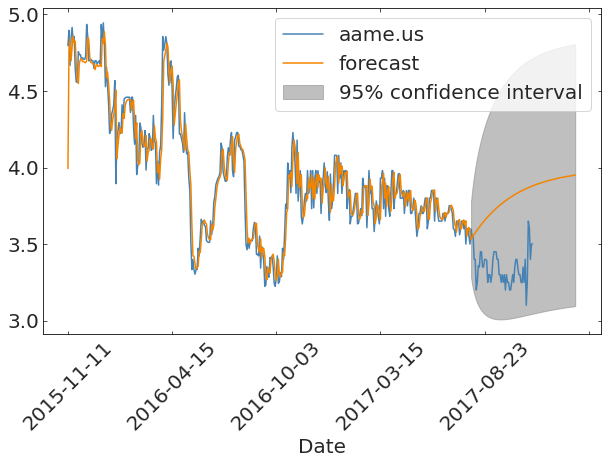

In [ ]:
ax = tss[['aame.us']].plot()

mod.plot_predict(end=N+40, plot_insample=False, ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# 7. Question: Did you make money??
...

# 8. Question: what are the coefficients of the best fit model? what do they mean? 


#  9. Task: choose 2 non stationary time series in the set that are not correlated and repeat Tasks 5 amd 6 with the ARIMA model

choose integration 1 to start ...

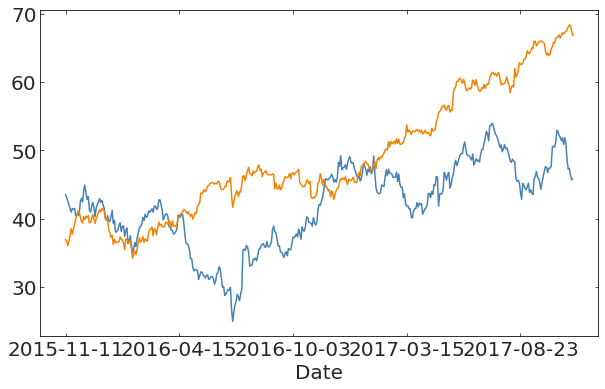

In [ ]:
ax = tss[timeseries[0]].plot()
tss[timeseries[1]].plot(ax=ax)

#10. Question: Did you get rich?

# 11 Task: Redo the fit to one of the non-stsationary lightcurves with a different order of integration and compare the results. What do the coefficients tell you?